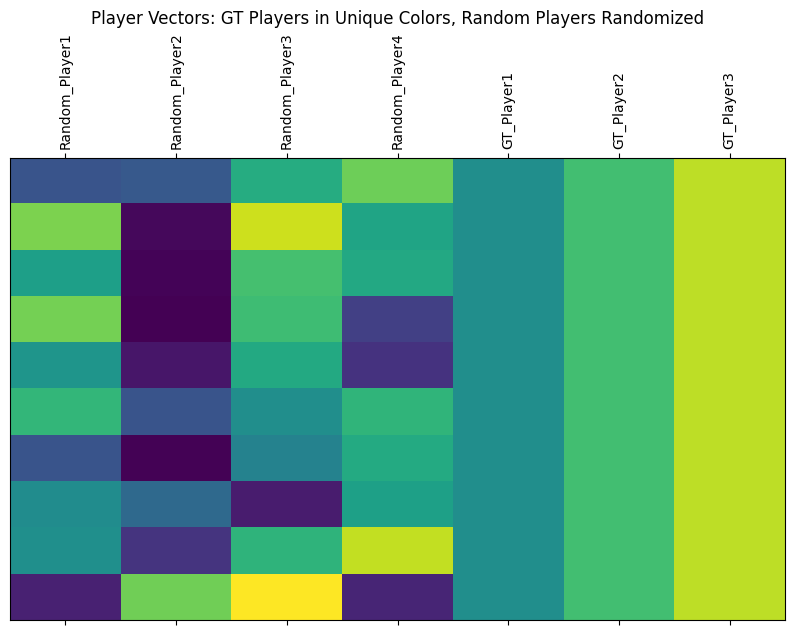

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
merged_list = ['Random_Player1', 'Random_Player2', 'Random_Player3', 'Random_Player4', 'GT_Player1', 'GT_Player2', 'GT_Player3']
gt_players = ['GT_Player1', 'GT_Player2', 'GT_Player3']

# Assign unique solid colors for each GT player
gt_colors = np.linspace(0.5, 0.9, len(gt_players))

# Initialize player vectors dictionary
player_vectors = {}

# Set random values for random players and solid colors for GT players
for player in merged_list:
    if player in gt_players:
        # Assign a unique solid color to each GT player
        color_value = gt_colors[gt_players.index(player)]
        player_vectors[player] = np.full((10, 1), color_value)
    else:
        # Random values for non-GT (random) players
        player_vectors[player] = np.random.rand(10, 1)

# Concatenate player vectors for visualization
concatenated_vector = np.concatenate([player_vectors[player] for player in merged_list], axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(concatenated_vector, cmap='viridis', aspect='auto')

# Customize the plot
ax.set_yticks(np.arange(10))
ax.set_xticks(np.arange(len(merged_list)))
ax.set_xticklabels(merged_list, rotation=90)
ax.tick_params(axis='y', which='both', left=False, top=False, labelleft=False)
ax.set_title('Player Vectors: GT Players in Unique Colors, Random Players Randomized')

plt.show()



In [248]:
import json
import pickle
import random


playerEmbeddingsDict = pickle.load(open('/home/karolwojtulewicz/code/NSVA/data/all_players_BERT.pickle','rb'))
sentences = (json.load(open("/home/karolwojtulewicz/code/NSVA/data/new_ourds_description_only.json", 'r')))["sentences"]
data_stats = json.load(open('/home/karolwojtulewicz/code/NSVA/data/data_stats.json','r'))
actionID_to_Name = {"action{}".format(index):value for index,value in enumerate(json.load(open('/home/karolwojtulewicz/code/NSVA/data/action_list.json','r')))}
co_occurence_dict = data_stats["action_sequence_count"]
video_lineups = pickle.load(open('/home/karolwojtulewicz/code/NSVA/data/play_lineups.pickle', 'rb'))

def simulate_ball_possession(gt_players, random_players, actions, co_occurrence_actions):
    global actionID_to_Name
    # Ensure there's enough total players
    total_players_needed = random.randint(len(gt_players), len(random_players))
    total_players = random.sample(random_players, total_players_needed)
    
    # Check for "Made" condition and co-occurrence in the last actions
    action_name = actionID_to_Name[actions[-1]]
    made_condition = "Made" in action_name  and len(gt_players) >1 and random.random() < 0.5
    co_occurrence_condition = False
    if len(actions) > 1:
        co_occurrence_condition = " ".join(actions[-2:]) in co_occurrence_actions

    print("M:", made_condition, "C:", co_occurrence_condition, "Act len:", len(actions), "GT len:", len(gt_players))
    # Initialize the augmented player list
    augmented_players = []
    augmented_players.extend(total_players)
    random_indecies = None
    while random_indecies is None:
        tmp = [random.randint(0, len(augmented_players)-1) for _ in range(len(gt_players)-1)]
        if len(list(set(tmp))) == len(tmp):
            random_indecies = tmp
            random_indecies.sort()
    if made_condition or co_occurrence_condition:
        # Preserve the last GT player for all scenarios
        preserved_last_gt_players = gt_players[-2:]
        
        # Randomly insert the remaining GT players
        
        
                
        for gt_player in gt_players[:-1]:  # Excluding the last player for now
            insert_pos = random_indecies.pop(0)
            augmented_players.insert(insert_pos, gt_player)
        
        # Add the random players
        
        augmented_players.extend(preserved_last_gt_players)
    else:
        
        for gt_player in gt_players[:-1]:  # Excluding the last player for now
            insert_pos = random_indecies.pop(0)
            augmented_players.insert(insert_pos, gt_player)
                
        # Ensure the last GT player is at the end
        if gt_players:
            augmented_players.append(gt_players[-1])

    return augmented_players


def getLineupData():
    global sentences, co_occurence_dict, video_lineups
    sentence = None
    
    while sentence is None:
        sentence_tmp = random.choice(sentences)
        if sentence_tmp.get("caption") and sentence_tmp["caption"].split("_")[0] == "<T3>":
            sentence = sentence_tmp
    gt_players = sentence["question"].split(" ")
    actions = sentence["actions"].split(" ")
    video_id = sentence["video_id"]
    
    if video_id not in video_lineups:
        # get closest video_id
        video_id = min(video_lineups.keys(), key=lambda x:abs(x-video_id))
        
    lineups = video_lineups[video_id]
    home_lineup, away_lineup = list(lineups["home_lineup"]), list(lineups["away_lineup"])
    
    def filter_func(player):
        if player in gt_players:
            return False
        return True
    lineup = home_lineup + away_lineup
    filtered_lineup = list(filter(filter_func,lineup))[:7]
    return gt_players, filtered_lineup, co_occurence_dict, actions, video_id



for _ in range(1000):

    gt_players, filtered_lineup, co_occurence_dict, actions, video_id = getLineupData()
    # Simulate ball possession
    if gt_players[0] != "":
        augmented_players = simulate_ball_possession([x for x in gt_players], filtered_lineup, actions, co_occurence_dict)
    else:
        augmented_players = None
    if len(gt_players) > 2:
        print(augmented_players, gt_players)


M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: True Act len: 2 GT len: 2
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 2 GT len: 2
M: False C: False Act len: 2 GT len: 2
M: False C: False Act len: 1 GT len: 1
M: False C: True Act len: 2 GT len: 2
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: False Act len: 1 GT len: 1
M: False C: True Act len: 2 GT len: 2
M: False C: True Act len: 2 GT len: 2
M: False C: False Act len: 1 